In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset = pd.read_csv('competitor_prices.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25900 entries, 0 to 25899
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sku_id            25900 non-null  object 
 1   date              25637 non-null  object 
 2   competitor_id     25623 non-null  object 
 3   competitor_price  25358 non-null  float64
dtypes: float64(1), object(3)
memory usage: 809.5+ KB


In [ ]:
df_cp = dataset.copy()
df_cp.head()

,sku_id,date,competitor_id,competitor_price
0,P0851,2024-12-11,C003,1843.81
1,P0953,2024-10-05,C002,1076.10
2,P0251,2025-04-22,C006,2248.44
3,P0901,2025-05-17,C007,1990.13
4,P1405,2025-01-26,C005,1721.84


In [ ]:
df_cp.isnull().sum()

,0
sku_id,0
date,263
competitor_id,277
competitor_price,542


In [ ]:
# Handle Missing Values
# Drop rows with missing date or competitor_price
df_cp = df_cp[~df_cp['date'].isnull()]
df_cp = df_cp[~df_cp['competitor_price'].isnull()]


In [ ]:
df_cp['competitor_id'].fillna('unknown', inplace=True)

/tmp/ipython-input-9-2639236101.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cp['competitor_id'].fillna('unknown', inplace=True)


In [ ]:
df_cp.isnull().sum()

,0
sku_id,0
date,0
competitor_id,0
competitor_price,0


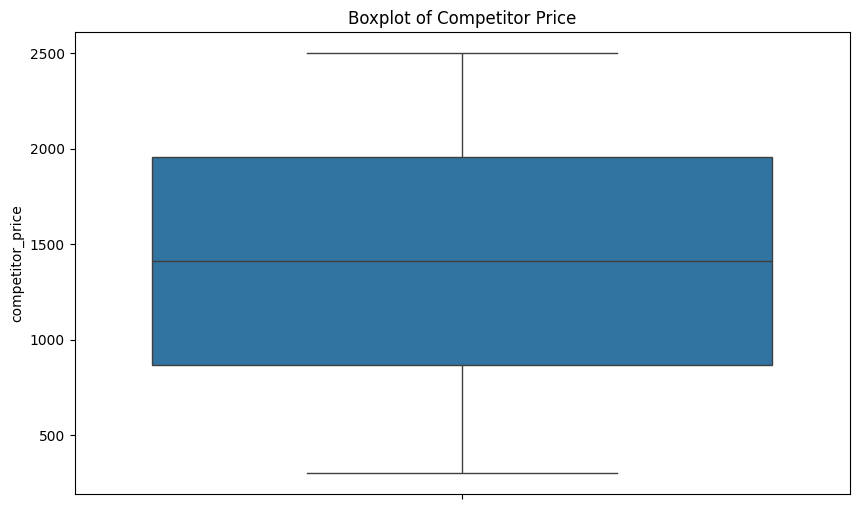

In [ ]:
#outliers
plt.figure(figsize=(10,6))
sns.boxplot(df_cp['competitor_price'])
plt.title('Boxplot of Competitor Price')
plt.show()


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25900 entries, 0 to 25899
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sku_id            25900 non-null  object 
 1   date              25637 non-null  object 
 2   competitor_id     25623 non-null  object 
 3   competitor_price  25358 non-null  float64
dtypes: float64(1), object(3)
memory usage: 809.5+ KB


In [ ]:
df_cp['date'] = pd.to_datetime(df_cp['date'], errors='coerce')
df_cp['competitor_id'] = df_cp['competitor_id'].astype(str)
df_cp['sku_id'] = df_cp['sku_id'].astype(str)
df_cp['competitor_price'] = pd.to_numeric(df_cp['competitor_price'], errors='coerce')


In [ ]:
df_cp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25096 entries, 0 to 25899
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   sku_id            25096 non-null  object        
 1   date              25096 non-null  datetime64[ns]
 2   competitor_id     25096 non-null  object        
 3   competitor_price  25096 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 980.3+ KB


In [ ]:
#formating
df_cp['competitor_id'] = df_cp['competitor_id'].str.strip().str.lower()
df_cp['sku_id'] = df_cp['sku_id'].str.strip().str.upper()

In [ ]:
df_cp.head(20)

,sku_id,date,competitor_id,competitor_price
0,P0851,2024-12-11,c003,1843.81
1,P0953,2024-10-05,c002,1076.10
2,P0251,2025-04-22,c006,2248.44
3,P0901,2025-05-17,c007,1990.13
4,P1405,2025-01-26,c005,1721.84
5,P0776,2024-08-02,c002,2145.48
6,P1287,2024-12-29,c003,956.41
7,P1037,2025-03-03,c001,1254.12
8,P1447,2025-01-10,c003,2426.01
9,P0157,2025-06-06,c002,2284.03


In [ ]:
# we done here
df_cp.to_csv("clean_competitor_prices.csv", index=False)
